# Chapter 15: Eigendecomposition and SVD Applications

## Concepts

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns

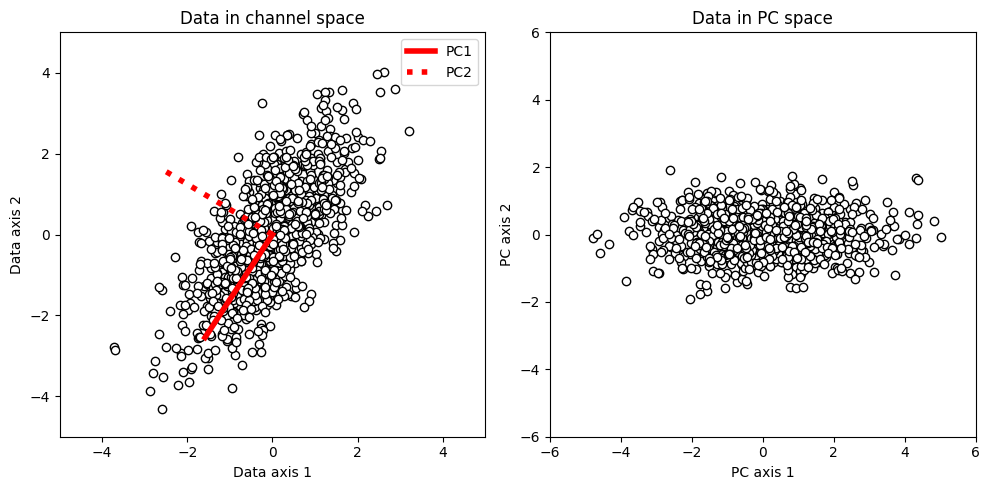

In [4]:
# PCA Plot

# create a random matrix
random_matrix_a = np.random.randn(1000,2)

# make the vars correlate linearly
random_matrix_a[:,1] = np.sum(random_matrix_a, axis=1)

# quick PCA using eigendecomposition
covariance_matrix = np.cov(random_matrix_a.T,ddof=1)
evals, evecs = np.linalg.eig(covariance_matrix)
scores = random_matrix_a @ evecs

# Create plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot data in channel space
axs[0].plot(random_matrix_a[:, 0], random_matrix_a[:, 1], 'ko', markerfacecolor='w')
axs[0].plot([0, 3 * evecs[0, 1]], [0, 3 * evecs[1, 1]], 'r-', linewidth=4, label='PC1')
axs[0].plot([0, 3 * evecs[0, 0]], [0, 3 * evecs[1, 0]], 'r:', linewidth=4, label='PC2')
axs[0].set_xlim([-5, 5])
axs[0].set_ylim([-5, 5])
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].legend()
axs[0].set_title('Data in channel space')

# Plot data in PC space
axs[1].plot(scores[:, 1], scores[:, 0], 'ko', markerfacecolor='w')
axs[1].set_xlim([-6, 6])
axs[1].set_ylim([-6, 6])
axs[1].set_xlabel('PC axis 1')
axs[1].set_ylabel('PC axis 2')
axs[1].set_title('Data in PC space')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
     

## Code Exercises

/Users/miesner.jacob/.pyenv/versions/3.8.6/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['ISE', 'ISE.1', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')
                 ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

             BOVESPA        EU        EM  
date                                      
2009-01-05  0.031190  0.012698  0.028524  
2009-01-06  0.018920  0.011341  0.008773  
2009-01-07 -0.035899 -0.017073 -0.020015  
2009-01-08  0.028283 -0.005561 -0.019424  
2009-01-09 -0.009764 -0.010989 -0.007802  
<bound method DataFrame.info of                  ISE     ISE.1        SP       DAX    

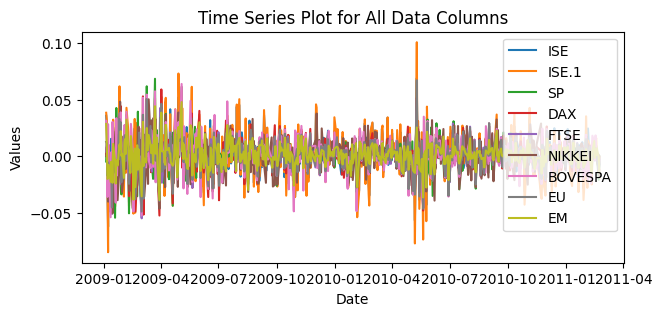

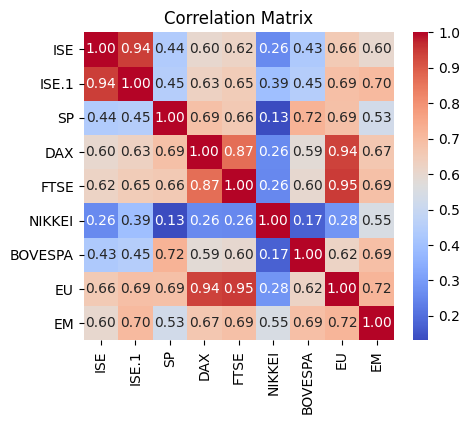

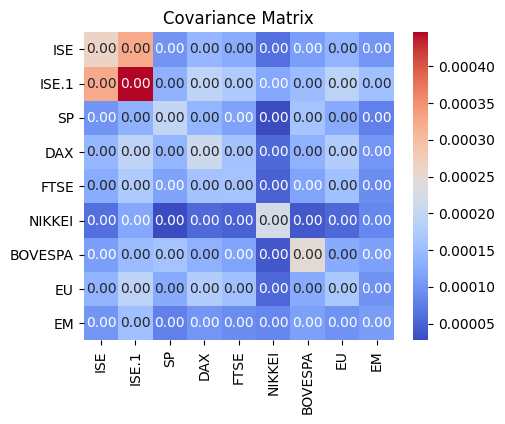

(536, 2)
Variance of first two components:
[0.0013006  0.00028585]

First two eigenvalues:
[0.0013006  0.00028585]


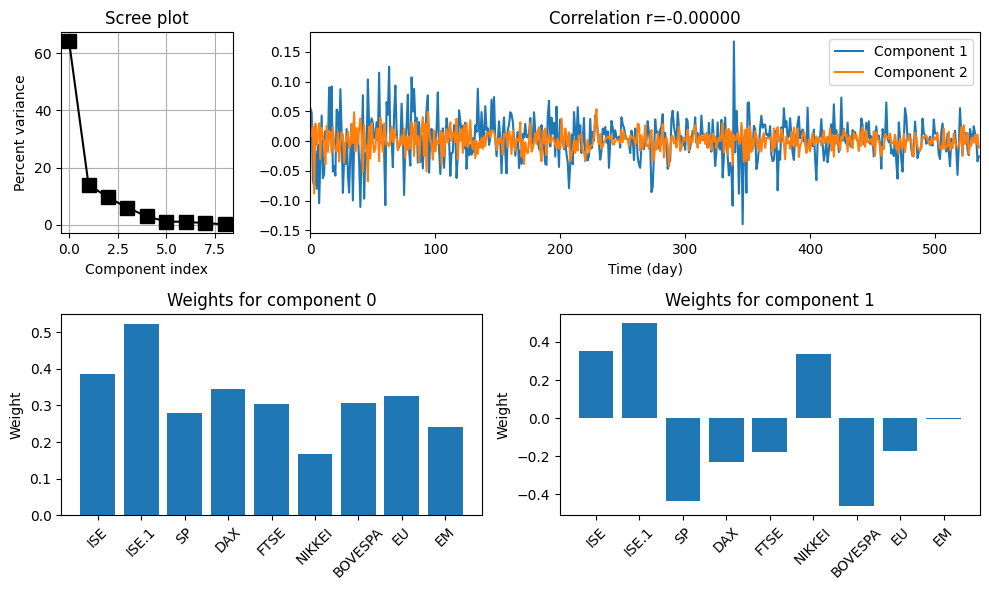

In [30]:
# Exercise 15-1 (Exploratory Data Analysis & Principal Component Analysis via Eigendecomposition)

# Import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url, index_col=0, skiprows=1)

# EDA
print(data.columns)
print(data.head())
print(data.info)
print(data.describe)

# Time series plot of date and market returns
plt.figure(figsize=(7, 3))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for All Data Columns')
plt.legend()
plt.show()


# Create a correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Create a covariance matrix
covariance_matrix = data.cov()

# Plot the covariance matrix
plt.figure(figsize=(5, 4))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()


### Now perform the PCA ###
# Step 1: covariance matrix
data_matrix = data.values  # extract data
data_matrix_centered = data_matrix - np.mean(data_matrix, axis=0, keepdims=True)  # mean-center via broadcasting

# Note: these data are observations-by-features, so we need X'X, not XX'
covariance_matrix = data_matrix_centered.T @ data_matrix_centered / (data_matrix_centered.shape[0] - 1)

# Step 2: eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 3: sort results
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]

# Step 4: component scores
component_scores = data.values @ eigenvectors[:, 0:2]
print(component_scores.shape)

# Step 5: eigenvalues to % variance
percent_variance_explained = 100 * eigenvalues / np.sum(eigenvalues)

# Show that variance of the components equals the eigenvalue
print('Variance of first two components:')
print(np.var(component_scores, axis=0, ddof=1))  # note the ddof=1! The default produces the biased variance.

print(f'\nFirst two eigenvalues:')
print(eigenvalues[:2])

# Now all in one figure
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 4, figure=fig)

# Scree plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(percent_variance_explained, 'ks-', markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('Scree plot')
ax1.grid()

# Component time series
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(component_scores)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0, component_scores.shape[0]])
ax2.legend(['Component 1', 'Component 2'])
ax2.set_title(f'Correlation r={np.corrcoef(component_scores.T)[0, 1]:.5f}')

# Bar plots of component loadings
axs = [fig.add_subplot(gs[1, :2]), fig.add_subplot(gs[1, 2:])]
for i in range(2):
    axs[i].bar(range(data_matrix_centered.shape[1]), eigenvectors[:, i])
    axs[i].set_xticks(range(data_matrix_centered.shape[1]))
    axs[i].set_xticklabels(data.columns, rotation=45)
    axs[i].set_ylabel('Weight')
    axs[i].set_title(f'Weights for component {i}')

plt.tight_layout()
plt.show()


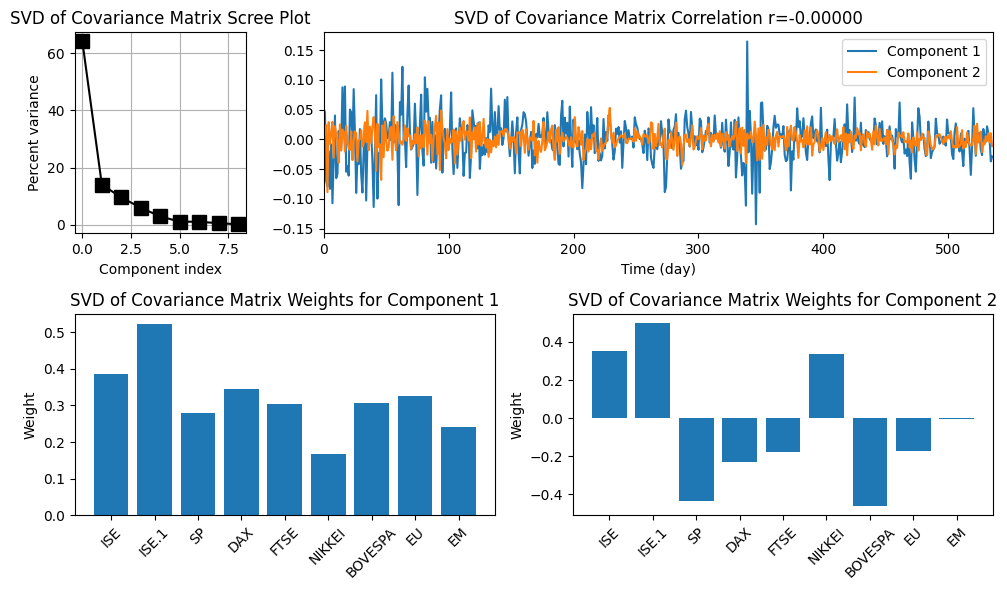

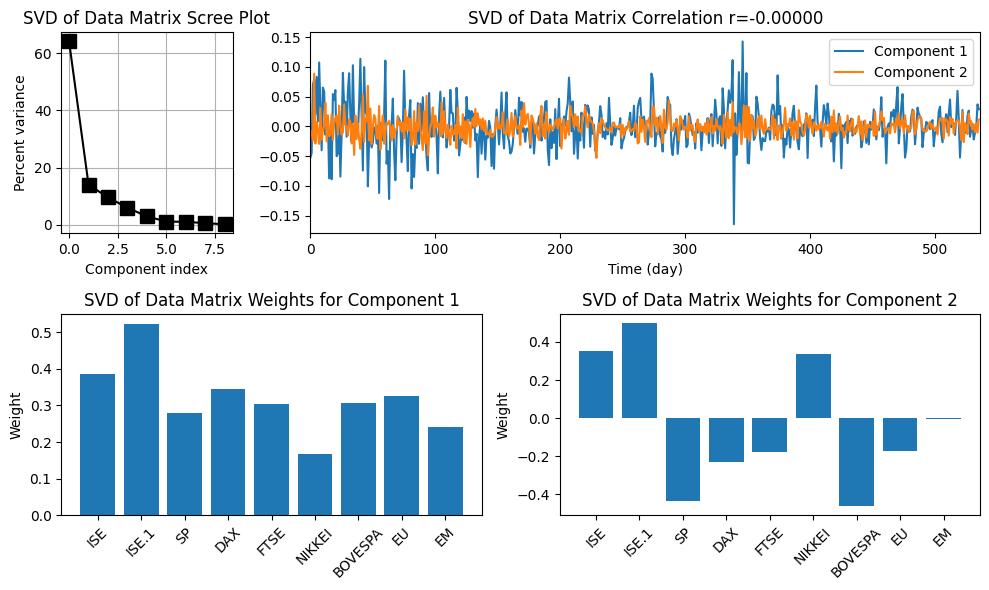

In [36]:
# Exercise 15-2 (Principal Component Analysis via Singular Value Decomposition)

# Center the data
data_matrix = data.values
data_matrix_centered = data_matrix - np.mean(data_matrix, axis=0, keepdims=True)

# Covariance matrix
covariance_matrix = data_matrix_centered.T @ data_matrix_centered / (data_matrix_centered.shape[0] - 1)

# PCA using SVD of the Covariance Matrix
U_cov, s_cov, Vt_cov = np.linalg.svd(covariance_matrix)
U_cov[:, 0] *= np.sign(U_cov[np.argmax(np.abs(U_cov[:, 0])), 0])
U_cov[:, 1] *= np.sign(U_cov[np.argmax(np.abs(U_cov[:, 1])), 1])
component_scores_cov = data_matrix_centered @ U_cov[:, :2]
percent_variance_explained_cov = 100 * s_cov / np.sum(s_cov)

# PCA using SVD of the Data Matrix
U_data, s_data, Vt_data = np.linalg.svd(data_matrix_centered)
Vt_data[0, :] *= np.sign(Vt_data[0, np.argmax(np.abs(Vt_data[0, :]))])
Vt_data[1, :] *= np.sign(Vt_data[1, np.argmax(np.abs(Vt_data[1, :]))])
component_scores_data = U_data[:, :2] * s_data[:2]
percent_variance_explained_data = 100 * (s_data**2) / np.sum(s_data**2)

# Plotting results for SVD of Covariance Matrix
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 4, figure=fig)

# Scree plot for SVD of Covariance Matrix
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(percent_variance_explained_cov, 'ks-', markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('SVD of Covariance Matrix Scree Plot')
ax1.grid()

# Component time series for SVD of Covariance Matrix
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(component_scores_cov)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0, component_scores_cov.shape[0]])
ax2.legend(['Component 1', 'Component 2'])
ax2.set_title(f'SVD of Covariance Matrix Correlation r={np.corrcoef(component_scores_cov.T)[0, 1]:.5f}')

# Bar plots of component loadings for SVD of Covariance Matrix
axs_cov = [fig.add_subplot(gs[1, :2]), fig.add_subplot(gs[1, 2:])]
for i in range(2):
    axs_cov[i].bar(range(data_matrix_centered.shape[1]), U_cov[:, i])
    axs_cov[i].set_xticks(range(data_matrix_centered.shape[1]))
    axs_cov[i].set_xticklabels(data.columns, rotation=45)
    axs_cov[i].set_ylabel('Weight')
    axs_cov[i].set_title(f'SVD of Covariance Matrix Weights for Component {i+1}')

plt.tight_layout()
plt.show()


# Plotting results for SVD of Data Matrix
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 4, figure=fig)

# Scree plot for SVD of Data Matrix
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(percent_variance_explained_data, 'ks-', markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('SVD of Data Matrix Scree Plot')
ax1.grid()

# Component time series for SVD of Data Matrix
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(component_scores_data)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0, component_scores_data.shape[0]])
ax2.legend(['Component 1', 'Component 2'])
ax2.set_title(f'SVD of Data Matrix Correlation r={np.corrcoef(component_scores_data.T)[0, 1]:.5f}')

# Bar plots of component loadings for SVD of Data Matrix
axs_data = [fig.add_subplot(gs[1, :2]), fig.add_subplot(gs[1, 2:])]
for i in range(2):
    axs_data[i].bar(range(data_matrix_centered.shape[1]), Vt_data[i, :])
    axs_data[i].set_xticks(range(data_matrix_centered.shape[1]))
    axs_data[i].set_xticklabels(data.columns, rotation=45)
    axs_data[i].set_ylabel('Weight')
    axs_data[i].set_title(f'SVD of Data Matrix Weights for Component {i+1}')

plt.tight_layout()
plt.show()

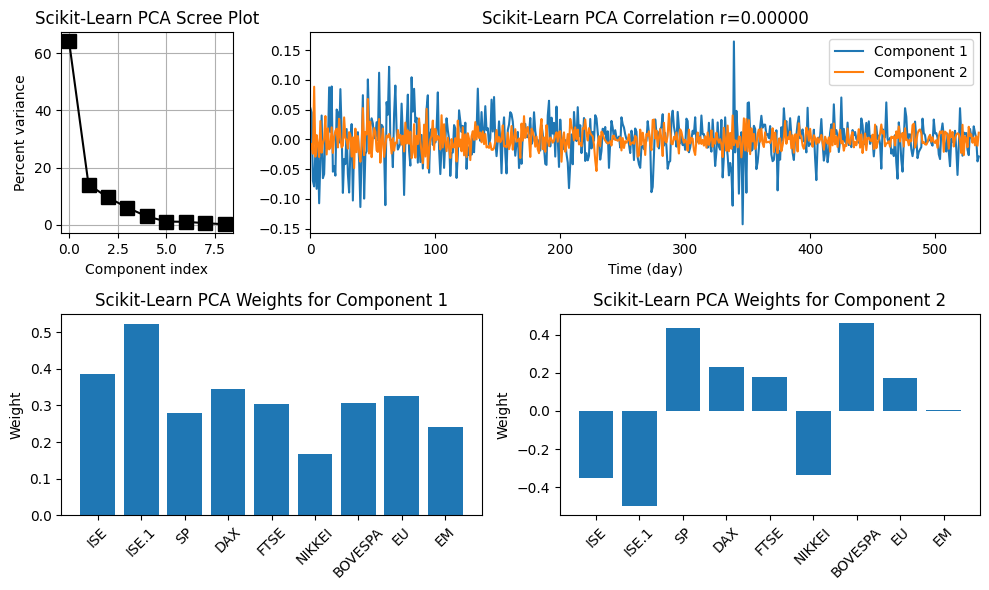

In [29]:
# Exercise 15-3 (Compare results of 'manual' Principal Component Anlaysis with Scikit Learn)
 
# Scikit-Learn PCA
pca = PCA()
pca_results = pca.fit_transform(data)
pca_component_scores = pca_results[:, :2]
pca_percent_variance_explained = 100 * pca.explained_variance_ratio_

# Plotting
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 4, figure=fig)

# Scree plot for Scikit-Learn PCA
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pca_percent_variance_explained, 'ks-', markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('Scikit-Learn PCA Scree Plot')
ax1.grid()

# Component time series for Scikit-Learn PCA
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(pca_component_scores)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0, pca_component_scores.shape[0]])
ax2.legend(['Component 1', 'Component 2'])
ax2.set_title(f'Scikit-Learn PCA Correlation r={np.corrcoef(pca_component_scores.T)[0, 1]:.5f}')

# Bar plots of component loadings for Scikit-Learn PCA
axs = [fig.add_subplot(gs[1, :2]), fig.add_subplot(gs[1, 2:])]
for i in range(2):
    axs[i].bar(range(data.shape[1]), pca.components_[i])
    axs[i].set_xticks(range(data.shape[1]))
    axs[i].set_xticklabels(data.columns, rotation=45)
    axs[i].set_ylabel('Weight')
    axs[i].set_title(f'Scikit-Learn PCA Weights for Component {i+1}')

plt.tight_layout()
plt.show()

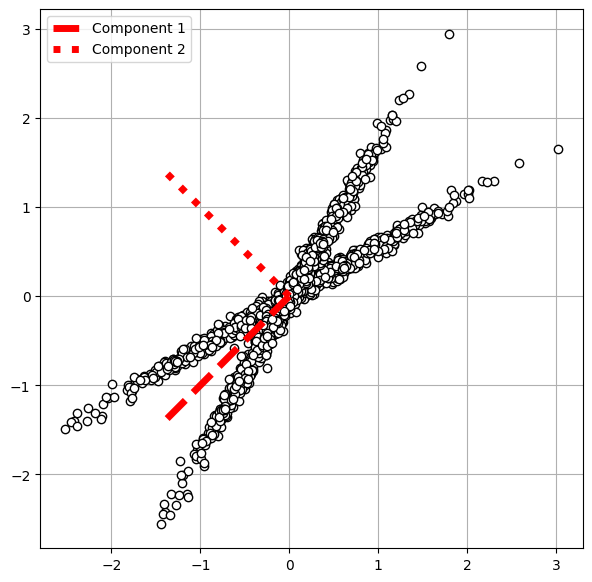

In [37]:
# Exercise 15-4 (Exploring the Limits of Principal Component Analysis)

# Generate data
data_matrix_x = np.hstack((np.random.randn(1000, 1), 0.05 * np.random.randn(1000, 1)))

# Rotation matrices
theta_1 = -np.pi / 6
rotation_matrix_1 = np.array([
    [np.cos(theta_1), -np.sin(theta_1)],
    [np.sin(theta_1), np.cos(theta_1)]
])

theta_2 = -np.pi / 3
rotation_matrix_2 = np.array([
    [np.cos(theta_2), -np.sin(theta_2)],
    [np.sin(theta_2), np.cos(theta_2)]
])

# Create the data
data_matrix_X = np.vstack((data_matrix_x @ rotation_matrix_1, data_matrix_x @ rotation_matrix_2))

# PCA via SVD
U, singular_values, Vt = np.linalg.svd(data_matrix_X - np.mean(data_matrix_X, axis=0, keepdims=True))

# Convert singular values into eigenvalues (optional)
eigenvalues = singular_values ** 2 / (data_matrix_X.shape[0] - 1)

# Up-scale the singular vectors for visualization (optional)
Vt *= 2

# Plot the data and eigenvectors
plt.figure(figsize=(7, 7))

# Plot the data
plt.plot(data_matrix_X[:, 0], data_matrix_X[:, 1], 'ko', markerfacecolor='w')

# Plot the eigenvectors
plt.plot([0, Vt[0, 0]], [0, Vt[1, 0]], 'r--', linewidth=5, label='Component 1')
plt.plot([0, Vt[0, 1]], [0, Vt[1, 1]], 'r:', linewidth=5, label='Component 2')

# Add legend and grid
plt.legend()
plt.grid()

# Save and show the plot
plt.show()

# Notes:
# 1. PCA identifies the directions (principal components) in which the variance of the data is maximized.
# 2. The two principal components (shown as red lines) are orthogonal and indicate the directions of maximum variance.
# 3. However, PCA is sensitive to the scaling of the data. If features are on different scales, PCA might give more importance to features with higher variance.
# 4. In this example, the rotation matrices create clusters with different orientations, but PCA still finds global directions of variance, which may not align with the individual clusters' orientations.

In [ ]:
# Exercise 15-5 (Creating a 2D dataset for performing Linear Discriminant Analysis)

In [ ]:
# Exercise 15-6 (Perform LDA using numpy)

In [ ]:
# Exercise 15-7 (Demonstating non-orthogonal eigenvectors for generalized egendecomposition, and orthognal eigenvectors for the space of the denominator matrix)

In [ ]:
# Exercise 15-8 (Perform Linear Discriminant Analysis using Scikit Learn)

In [ ]:
# Exercise 15-9 (Using Scikit Learn to explore the effect of shrinkage regularization)

In [ ]:
# Exercise 15-10 (Low-Rank Approximations via Singular Value Decomposition)

In [ ]:
# Exercise 15-11 (Use more layers to get an accurate conmpression of original image)

In [ ]:
# Exercise 15-12 (Measure Frobenius Norm between original and k-rank approximations)

In [ ]:
# Exercise 15-13 (Creating noisy image for use in denoising)

In [ ]:
# Exercise 15-14 (Denoising via Low-rank Approximations using Singular Value Decomposition)